## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [PART-03 (HANDLING WITH OUTLIERS)](#1)
* [THE EXAMINATION OF OUTLIERS IN THE COLUMNS](#2) 
* [DUMMY OPERATION](#3)    
* [THE END OF DATA CLEANING (PART - 03)](#4)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy, Pandas & other related you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

## functions to fill the missing values

In [3]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [4]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART - 03 (Handling with Outliers)</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [6]:
df = pd.read_csv("filled_scout.csv")

In [7]:
df.shape

(15919, 32)

In [8]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Warranty,NaN,NaN,NaN
Cylinders,3.000,4.000,NaN
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"['Air conditioning', 'Armrest', 'Automatic cli...","['Air conditioning', 'Automatic climate contro...","['Air conditioning', 'Cruise control', 'Electr..."


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of OUTLIERS in the Columns</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## km

In [9]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6692
--------------------------------
10.000       1045
1647.363      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6692, dtype: int64


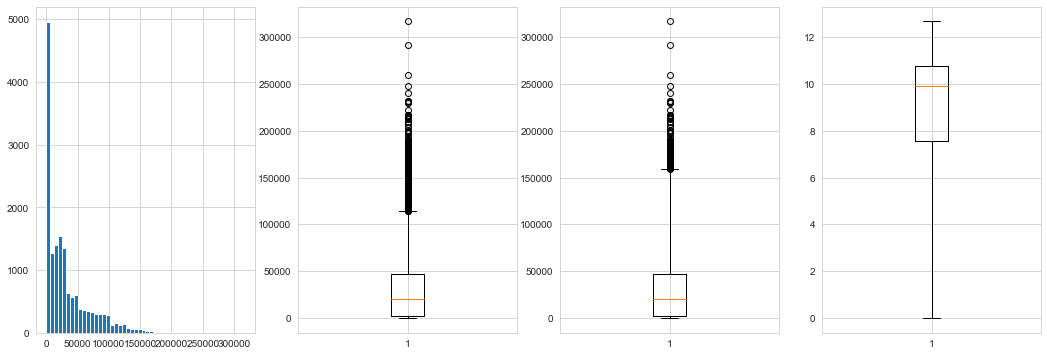

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

In [11]:
#df["km_logged"] = np.log(df.km)

**``km``** **is a variable with a wide range of values. We CANNOT consider the extreme values above as  genuine outliers. So let's keep these extreme values as they are.**

## Gears

In [12]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 29.6
num_of_nulls   :  4712
num_of_uniques :  10
--------------------------------
6.000     5822
NaN       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64


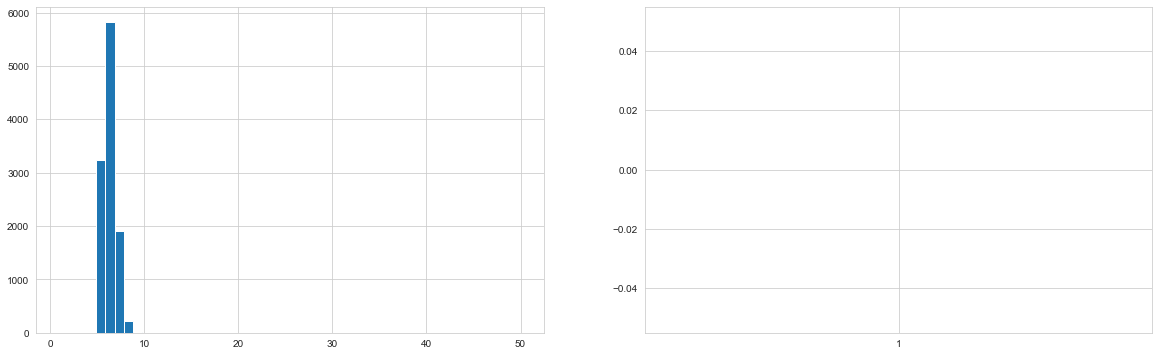

In [13]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [14]:
df.Gears.describe()

count   11207.000
mean        5.925
std         0.848
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: Gears, dtype: float64

In [15]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

14495   50.000
15824    9.000
15869    9.000
15827    9.000
15876    9.000
15814    9.000
15812    9.000
12028    8.000
11999    8.000
12008    8.000
Name: Gears, dtype: float64

In [16]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

8921    1.000
14375   1.000
9812    2.000
15817   3.000
15845   3.000
15823   4.000
15822   4.000
10259   5.000
10260   5.000
10261   5.000
Name: Gears, dtype: float64

In [17]:
# Let's check the observations having extreme Gear value.  
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
8921,Opel Corsa,Compact,Semi-automatic,1.000
9812,Opel Corsa,Sedans,Manual,2.000
14375,Renault Clio,Compact,Automatic,1.000
14495,Renault Clio,Sedans,Manual,50.000
15812,Renault Espace,Van,Automatic,9.000
15814,Renault Espace,Van,Automatic,9.000
15817,Renault Espace,Van,Automatic,3.000
15822,Renault Espace,Van,Automatic,4.000
15823,Renault Espace,Van,Automatic,4.000
15824,Renault Espace,Van,Automatic,9.000


In [18]:
# Let's check the observations belongs to "Renault Espace" model to see distribution of Gear values.  
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
14928,Renault Espace,NaN,Automatic,NaN
14929,Renault Espace,Station wagon,Automatic,6.000
14930,Renault Espace,Transporter,Automatic,6.000
14931,Renault Espace,Van,Automatic,NaN
14932,Renault Espace,Van,Automatic,6.000
14933,Renault Espace,Transporter,Automatic,NaN
14934,Renault Espace,Van,Automatic,NaN
14935,Renault Espace,Van,Automatic,6.000
14936,Renault Espace,Off-Road,Automatic,6.000
14937,Renault Espace,Van,Automatic,6.000


**Is it possible that there have been modern cars with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?**

Most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears. A few have as many as 10 [Source](https://www.quora.com/What-are-maximum-number-of-transmission-gears).
Contemporary manual transmissions for cars typically use five or six forward gears ratios and one reverse gear, however, transmissions with between two and seven gears have been produced at times [Source](https://en.wikipedia.org/wiki/Manual_transmission).

In [19]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [20]:
df.Gears.isnull().sum()

4726

In [21]:
fill(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  33
------------------
6.000    8397
5.000    5354
7.000    1911
8.000     224
NaN        33
Name: Gears, dtype: int64


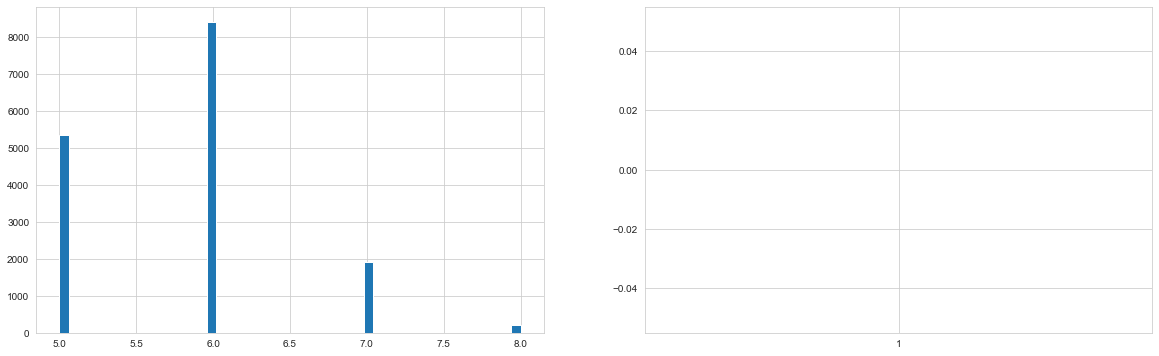

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

## displacement_cc

In [23]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 3.12
num_of_nulls   :  496
num_of_uniques :  77
--------------------------------
1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
NaN           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300

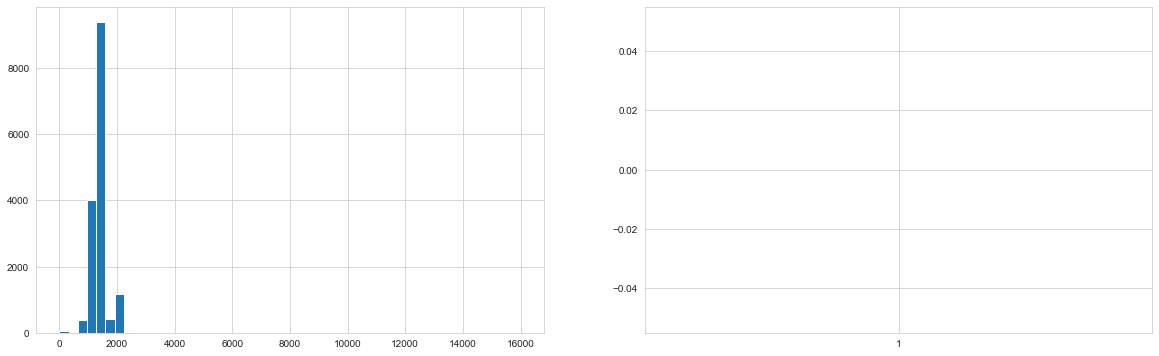

In [24]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [25]:
df.Displacement_cc.describe()

count   15423.000
mean     1423.541
std       333.531
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [26]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10932   16000.000
7169    15898.000
10771    2967.000
3602     2480.000
3610     2480.000
Name: Displacement_cc, dtype: float64

In [27]:
df.sort_values(by=["Displacement_cc"], ascending=True)["Displacement_cc"].head(55)

12796     1.000
12768     1.000
13904     1.000
12823     1.000
12790     1.000
14319     1.000
14284     1.000
12849     1.000
12848     1.000
12781     1.000
12786     1.000
12467     1.000
14328     1.000
14326     1.000
12835     1.000
12750     1.000
12783     1.000
14314     1.000
14325     1.000
14315     1.000
14324     1.000
14322     1.000
14321     1.000
14327     1.000
12473     1.000
14320     1.000
12499     1.000
12484     1.000
12815     1.000
12554     1.000
12798     1.000
12769     1.000
12670     1.000
12604     1.000
12501     1.000
12800     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7812    139.000
7810    139.000
7811    139.000
7809    139.000
8128    140.000
15578   160.000
15575   160.000
15576   160.000
15577   160.000
15579   160.000
15574   160.000
13653   890.000
14749   898.000
14725   898.000
14761   898.000
Name: Displacement_cc, dtype: float64

In [28]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [29]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [30]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [31]:
df.Displacement_cc.isnull().sum()

549

In [32]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  23
------------------
1598.000    5058
999.000     2467
1398.000    1387
1399.000     772
1461.000     679
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      25
NaN           23
2480.000      20
1984.000      18
1200.000      18
899.000       11
1397.000      11
929.000        5
1499.000       5
1596.000       4
900.000        4
997.000        4
1396.000       3
1599.000       3
1199.000       3
1300.000       2
1589.000       2
1495.000       2
995.000        2
1368.000       1
1896.000       1
890.000        1
1568.000       1
1100.000       1
1333.000       1
1580.000       1
1995.000       1
1496.000       1
1533.000       1
1856.000       1
2967.000 

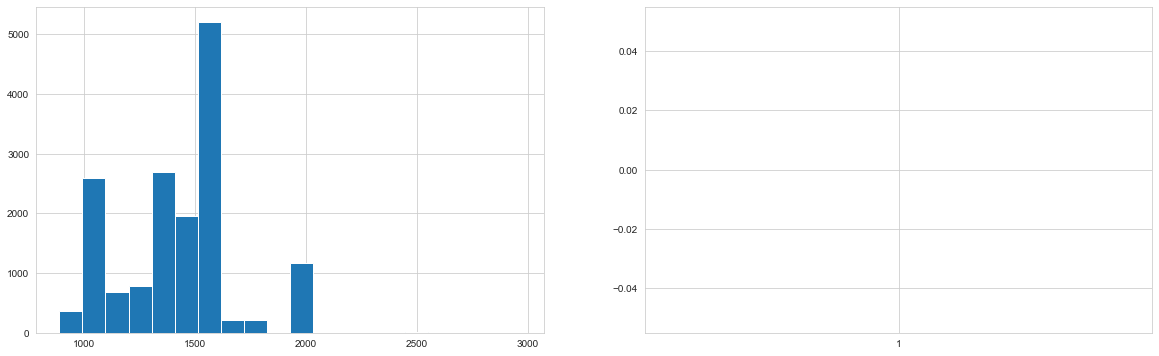

In [33]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

## Weight_kg

In [34]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 43.81
num_of_nulls   :  6974
num_of_uniques :  434
--------------------------------
NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
1135.000     213
1199.000     205
1734.000     170
1180.000     168
1503.000     165
1350.000     155
1355.000     135
1260.000     127
1275.000     112
1278.000     110
1487.000     109
1425.000     109
1255.000     108
1200.000     107
1522.000     103
1273.000     103
1280.000     102
1403.000      91
1120.000      90
1659.000      89
1195.000      89
1701.000      87
1250.000      84
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1685.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
12

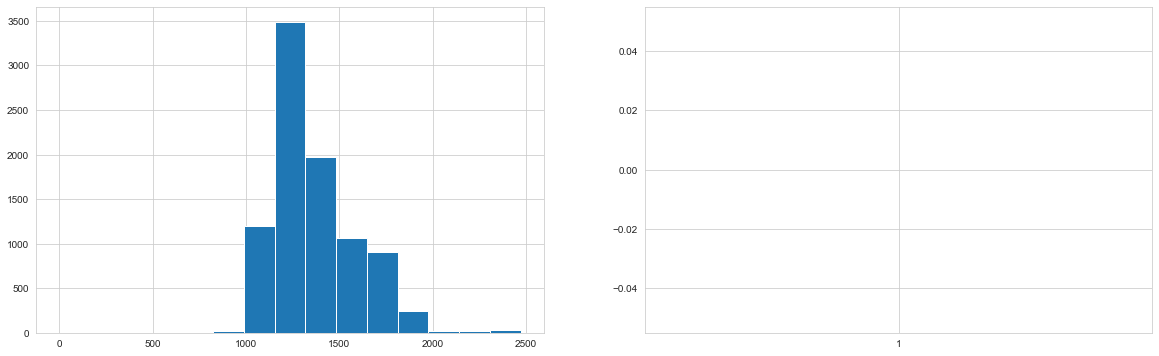

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

In [36]:
df.Weight_kg.describe()

count   8945.000
mean    1351.107
std      220.662
min        1.000
25%     1165.000
50%     1288.000
75%     1487.000
max     2471.000
Name: Weight_kg, dtype: float64

In [37]:
df["Weight_kg"].sort_values().head(10)

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
13513   977.000
13555   977.000
14479   980.000
14654   980.000
13609   980.000
Name: Weight_kg, dtype: float64

In [38]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [39]:
df["Weight_kg"].isnull().sum()

6977

In [40]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  52
------------------
1163.000    1581
1360.000    1402
1487.000     955
1135.000     828
1425.000     724
1180.000     695
1273.000     656
1165.000     577
1503.000     570
1734.000     529
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1260.000     127
1280.000     127
1278.000     123
1275.000     112
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1285.000      80
1308.000      80
1090.000      77
1110.000      75
1613.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1209.000      64
1071.000      64
1230.000      63
1205.000      59
1845.000      56
1052.000      53
1154.000      52
NaN           52
1664.000      52
1513.000      51
1065.000      50
1237.000      49
1088.000      46
1440.000 

In [41]:
df["Weight_kg"].isnull().sum()

52

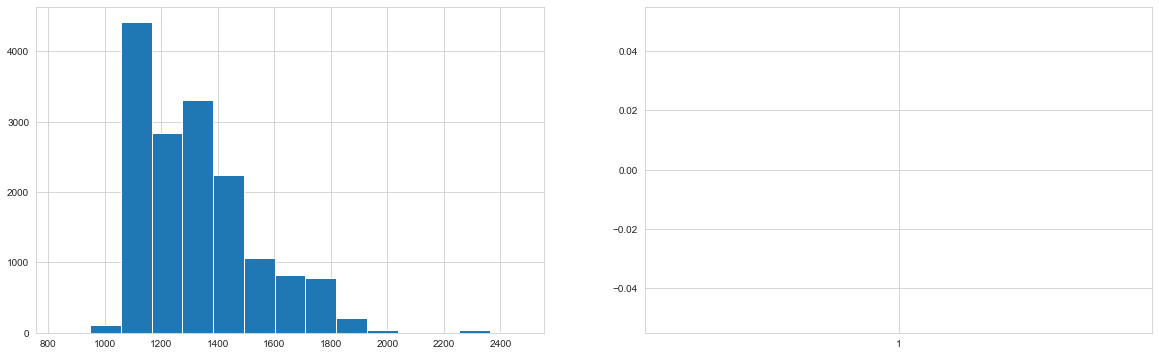

In [42]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

## hp_kW

In [43]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.55
num_of_nulls   :  88
num_of_uniques :  80
--------------------------------
85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000     

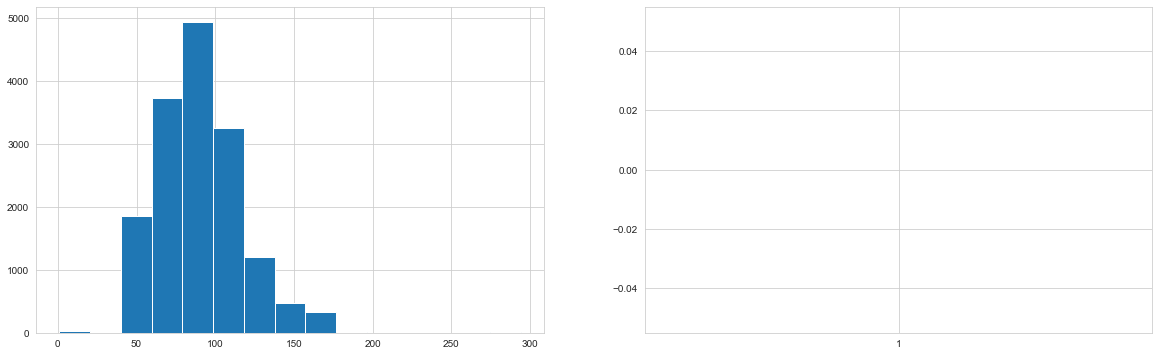

In [44]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

In [45]:
df.hp_kW.describe()

count   15831.000
mean       88.368
std        26.835
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

In [46]:
df.hp_kW.sort_values().head(50)

9285     1.000
10579    1.000
10468    1.000
9289     1.000
9288     1.000
7019     1.000
7018     1.000
7016     1.000
7014     1.000
6946     1.000
9290     1.000
6005     1.000
9292     1.000
6034     1.000
9287     1.000
9299     1.000
15155    1.000
15156    1.000
10580    1.000
10610    1.000
13885    4.000
3913     9.000
13759   40.000
8857    40.000
8408    44.000
9741    51.000
8693    51.000
8694    51.000
8715    51.000
8695    51.000
8696    51.000
8697    51.000
8701    51.000
8714    51.000
8710    51.000
8703    51.000
8705    51.000
8706    51.000
8709    51.000
8713    51.000
8712    51.000
8711    51.000
8702    51.000
8692    51.000
8627    51.000
8691    51.000
9728    51.000
9441    51.000
9729    51.000
9731    51.000
Name: hp_kW, dtype: float64

In [47]:
np.sort(df.hp_kW.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.,  nan])

In [48]:
df.hp_kW.loc[df.hp_kW < 51] = np.nan

In [49]:
df.hp_kW.isnull().sum()

113

In [50]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  1
------------------
85.000     2544
66.000     2125
81.000     1403
100.000    1318
110.000    1117
70.000      890
125.000     714
51.000      703
55.000      589
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      296
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
146.000      18
294.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
117.000       6
155.000       6
184.000       5
65.000        4
76.000        4
90.000        4
168.000       3
98.000        3
149.000       3
80.000        3
93.000        3
143.000       2
86.000        2
140.000       2
150.000       2
228.000       2
270.000       2
89

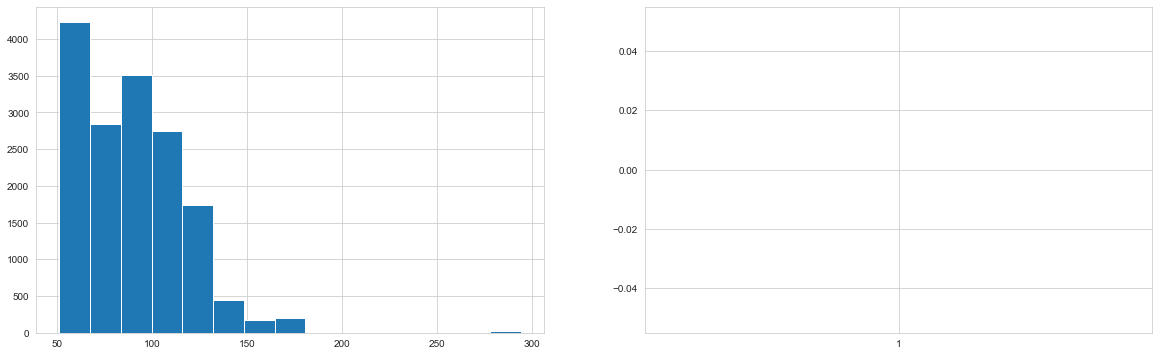

In [51]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

## CO2_Emission

In [52]:
first_looking("CO2_Emission")

column name    :  CO2_Emission
--------------------------------
per_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  122
--------------------------------
NaN          2436
120.000       740
99.000        545
97.000        537
104.000       501
102.000       477
103.000       445
114.000       382
124.000       372
107.000       362
108.000       362
119.000       361
106.000       349
128.000       329
126.000       282
85.000        275
118.000       270
110.000       266
127.000       257
117.000       254
111.000       237
113.000       235
109.000       234
139.000       224
140.000       218
129.000       213
105.000       202
135.000       202
92.000        198
130.000       180
123.000       178
150.000       174
112.000       171
143.000       171
95.000        161
116.000       157
141.000       156
98.000        151
133.000       145
136.000       145
137.000       133
125.000       132
134.000       130
145.000       126
149.000       117
153.000       113
147.0

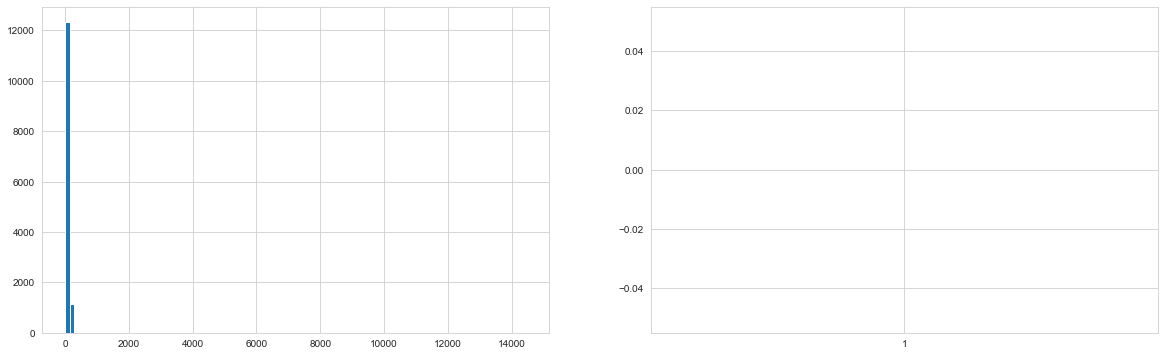

In [53]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

In [54]:
df.CO2_Emission.describe()

count   13483.000
mean      123.740
std       269.952
min         0.000
25%       104.000
50%       116.000
75%       129.000
max     14457.000
Name: CO2_Emission, dtype: float64

In [55]:
df.CO2_Emission.value_counts().sort_index()

0.000          2
1.000          1
5.000          3
14.000         1
36.000         3
45.000         1
51.000         1
80.000         1
82.000        25
84.000         2
85.000       275
87.000         6
88.000        15
89.000        19
90.000        35
91.000        31
92.000       198
93.000        66
94.000        37
95.000       161
96.000        22
97.000       537
98.000       151
99.000       545
100.000       36
101.000      105
102.000      477
103.000      445
104.000      501
105.000      202
106.000      349
107.000      362
108.000      362
109.000      234
110.000      266
111.000      237
112.000      171
113.000      235
114.000      382
115.000       86
116.000      157
117.000      254
118.000      270
119.000      361
120.000      740
121.000       82
122.000       83
123.000      178
124.000      372
125.000      132
126.000      282
127.000      257
128.000      329
129.000      213
130.000      180
131.000       48
132.000      100
133.000      145
134.000      1

In [56]:
df.groupby(["make_model", "body_type", "CO2_Emission"]).price.describe()

count      mean       std  \
make_model     body_type     CO2_Emission                               
Audi A1        Compact       90.000         1.000 12880.000       NaN   
                             91.000         5.000 13038.000  1108.927   
                             92.000         1.000 12479.000       NaN   
                             94.000         5.000 13960.000  1232.071   
                             97.000       113.000 15449.593  2445.755   
                             98.000        33.000 16574.364  2637.087   
                             99.000        19.000 16043.947  2257.403   
                             100.000        4.000 16127.500  1583.401   
                             102.000      147.000 16946.871  2850.063   
                             103.000       30.000 21233.033  1794.551   
                             104.000      126.000 17411.413  3149.373   
                             105.000       14.000 22234.857   812.264   
                             106.000       43.000 19831.791  3335.793   
                             107.000       13.000 16527.692  1620.412   
                             108.000       42.000 23587.095  3375.693   
                             109.000       34.000 17029.324  2514.314   
                             110.000       51.000 26340.373  2434.738   
                             111.000      138.000 23765.283  3477.921   
                             112.000       25.000 19960.360  2676.262   
                             113.000        5.000 20388.000  2796.188   
                             114.000        1.000 15490.000       NaN   
                             115.000        7.000 24067.857  6950.650   
                             116.000       20.000 23580.950  2813.103   
                             117.000        8.000 19094.875  2942.954   
                             118.000        2.000 13615.000    91.924   
                             119.000        1.000 12550.000       NaN   
                             120.000       27.000 15850.000     0.000   
                             121.000        2.000 18710.000  3224.407   
                             122.000        1.000 20881.000       NaN   
                             123.000       17.000 19308.647  3816.070   
                             126.000        1.000 19999.000       NaN   
                             127.000        2.000 19888.000     0.000   
                             134.000        2.000 22495.000   841.457   
                             136.000        2.000 29088.000   128.693   
                             137.000        2.000 28660.000   282.843   
                             142.000        2.000 28750.000   268.701   
                             331.000        1.000 12990.000       NaN   
               Coupe         97.000         1.000 13950.000       NaN   
               Other         97.000         1.000 16590.000       NaN   
                             99.000         2.000 16900.000     0.000   
                             106.000        1.000 21850.000       NaN   
                             108.000        3.000 26233.333   577.350   
                             134.000        1.000 23490.000       NaN   
               Sedans        89.000         4.000 16572.500   288.141   
                             90.000         3.000 14396.333   532.382   
                             91.000        14.000 14228.500  1438.927   
                             92.000        42.000 15764.548  1578.276   
                             94.000        12.000 15710.000  2522.329   
                             95.000         2.000 13070.000  2305.168   
                             97.000       314.000 14900.494  1997.181   
                             98.000        66.000 16021.848  1512.571   
                             99.000        99.000 16162.616  2134.698   
                             100.000        3.000 14490.000     0.000   
                             

In [57]:
cond = ((df.CO2_Emission < 36) | (df.CO2_Emission > 330))

df.loc[cond, "CO2_Emission"] = np.nan

In [58]:
df.CO2_Emission.isnull().sum()

2452

In [59]:
fill(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
120.000    850
119.000    700
102.000    689
104.000    680
106.000    617
99.000     545
97.000     538
124.000    516
140.000    513
103.000    445
107.000    418
114.000    406
113.000    384
108.000    362
125.000    342
128.000    333
133.000    331
118.000    314
130.000    296
110.000    289
117.000    286
126.000    282
85.000     275
127.000    257
111.000    237
109.000    234
139.000    224
129.000    213
135.000    202
105.000    202
92.000     198
123.000    186
150.000    174
112.000    171
143.000    171
95.000     161
116.000    157
141.000    156
98.000     151
136.000    145
137.000    133
134.000    130
145.000    126
149.000    117
153.000    113
147.000    109
101.000    105
132.000    100
115.000     86
122.000     83
121.000     82
138.000     77
93.000      66
131.000     61
142.000     58
168.000     58
90.000      54
148.000     48
144.000     40
154.000     40
94.000      37
146.000     36
100.000     36
151.000     34
18

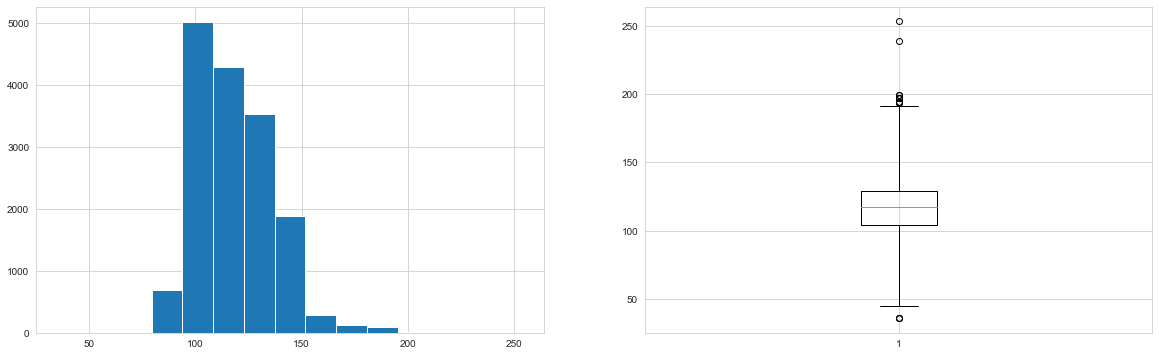

In [60]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

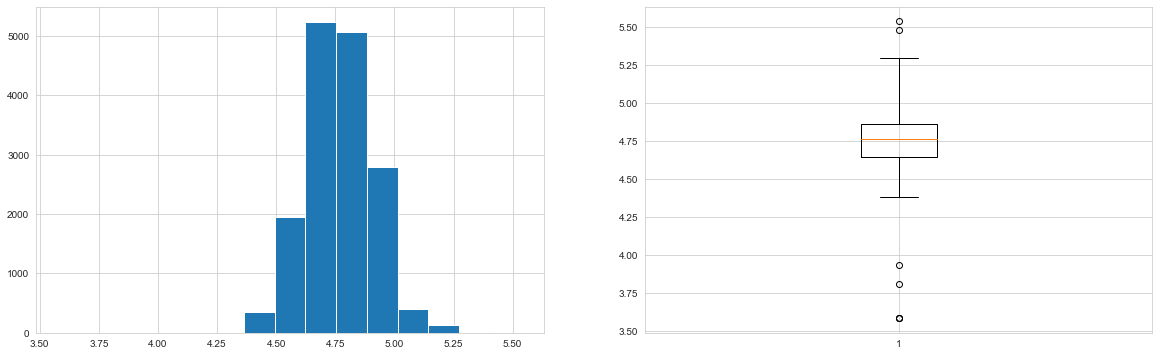

In [61]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(np.log(df.CO2_Emission), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_Emission), whis=2.5)

plt.show()

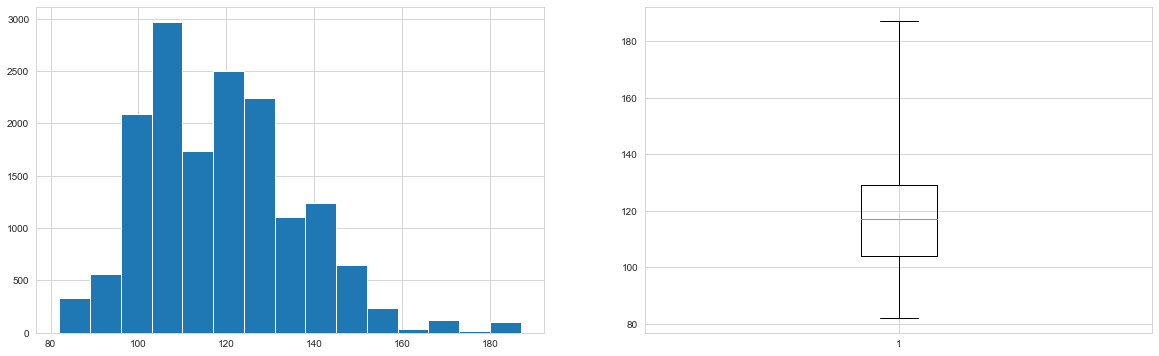

In [62]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(winsorize(df.CO2_Emission, (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df.CO2_Emission, (0.001, 0.003)), whis=2.5)

plt.show()

## cons_comb

In [63]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 12.77
num_of_nulls   :  2033
num_of_uniques :  72
--------------------------------
NaN       2033
5.400      770
3.900      733
4.000      713
5.100      657
4.400      623
5.600      618
4.700      602
3.800      585
4.800      546
5.000      545
4.500      523
5.200      454
4.200      435
4.600      426
4.900      393
5.500      380
5.300      380
3.700      369
5.900      369
4.100      342
5.700      342
6.000      331
4.300      307
3.300      307
3.500      288
6.200      216
3.600      194
6.300      181
6.100      175
5.800      164
6.600      148
6.800      136
3.400      106
6.400       75
3.000       69
7.400       66
6.500       43
6.700       43
7.100       38
10.000      34
6.900       27
3.200       25
8.300       20
7.600       14
7.000       10
3.100        7
7.200        6
7.800        6
8.000        5
51.000       4
8.600        4
7.900        3
8.700        3
1.600        3
7.300      

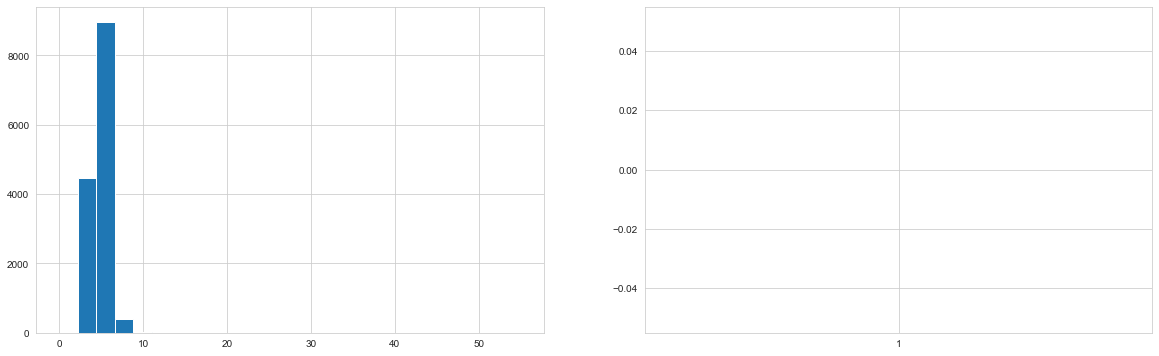

In [64]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

In [65]:
df.cons_comb.describe()

count   13886.000
mean        4.896
std         1.635
min         0.000
25%         4.100
50%         4.800
75%         5.500
max        55.000
Name: cons_comb, dtype: float64

In [66]:
df.cons_comb.sort_values().head(10)

8217    0.000
10566   0.000
14902   1.000
13678   1.200
3617    1.600
3615    1.600
3612    1.600
6240    3.000
13577   3.000
8036    3.000
Name: cons_comb, dtype: float64

In [67]:
df.cons_comb.sort_values().tail(10)

15785   NaN
15795   NaN
15804   NaN
15805   NaN
15833   NaN
15857   NaN
15883   NaN
15903   NaN
15908   NaN
15909   NaN
Name: cons_comb, dtype: float64

**Considering our domain knowledge, we can conclude that min value of 1.6 and max value of 9.10 are normal.**

## Nr_of_Doors

In [68]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 1.33
num_of_nulls   :  212
num_of_uniques :  6
--------------------------------
5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


In [69]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [70]:
df.Nr_of_Doors.isnull().sum()

214

In [71]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  1
------------------
5.000    11788
4.000     3079
3.000      832
2.000      219
NaN          1
Name: Nr_of_Doors, dtype: int64


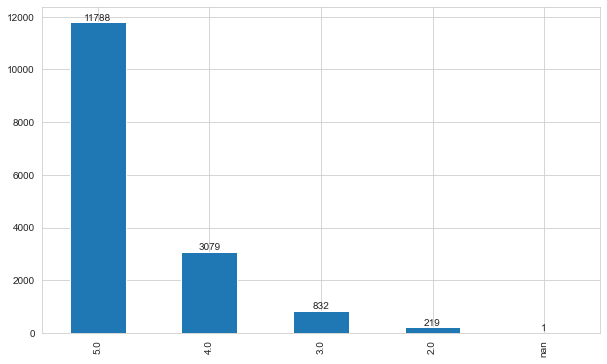

In [72]:
fig, ax = plt.subplots()

df.Nr_of_Doors.value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

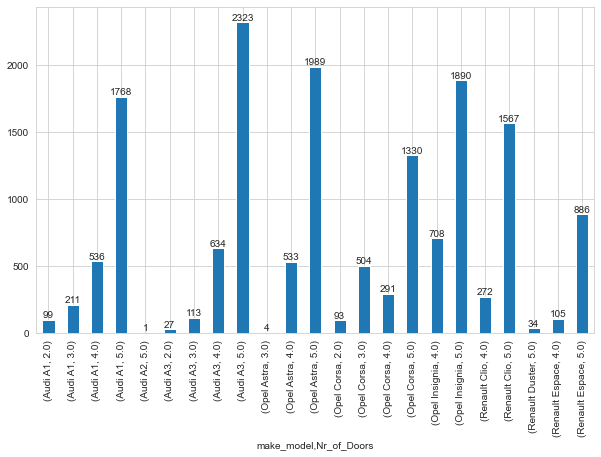

In [73]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [74]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

## Nr_of_Seats

In [75]:
first_looking("Nr_of_Seats")

column name    :  Nr_of_Seats
--------------------------------
per_of_nulls   :  % 6.14
num_of_nulls   :  977
num_of_uniques :  6
--------------------------------
5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


In [76]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [77]:
df.Nr_of_Seats.isnull().sum()

980

In [78]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  47
------------------
5.000    14264
4.000     1127
7.000      362
2.000      119
NaN         47
Name: Nr_of_Seats, dtype: int64


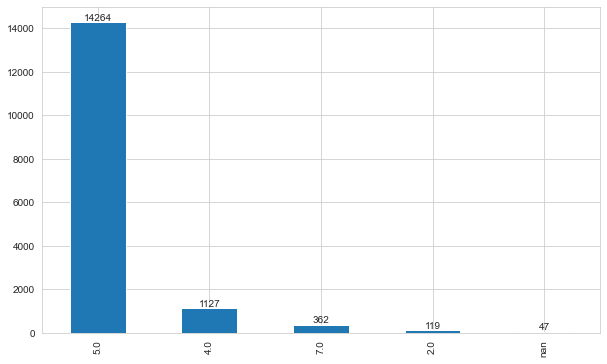

In [79]:
fig, ax = plt.subplots()

df.Nr_of_Seats.value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

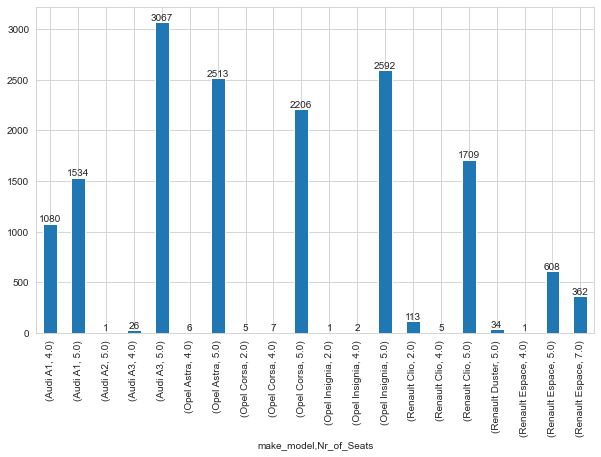

In [80]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [81]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

## price

In [82]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


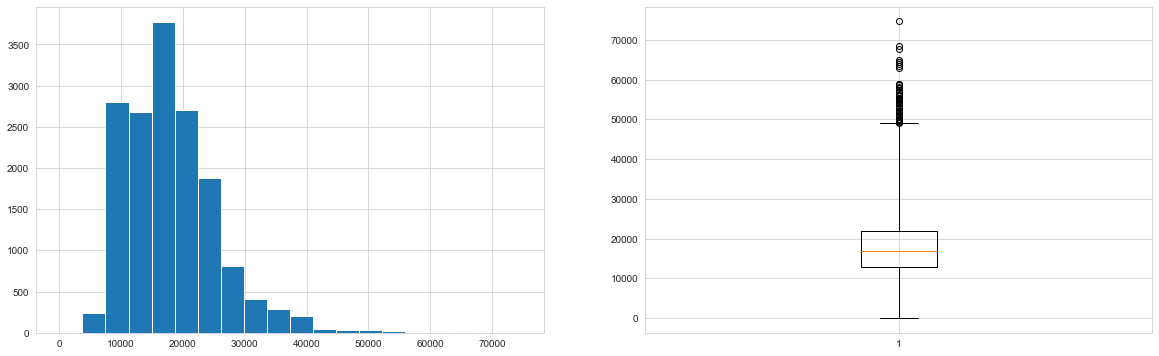

In [83]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [84]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [85]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [86]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [87]:
df.drop(drop_index, axis=0, inplace=True)

In [88]:
df.shape

(15915, 30)

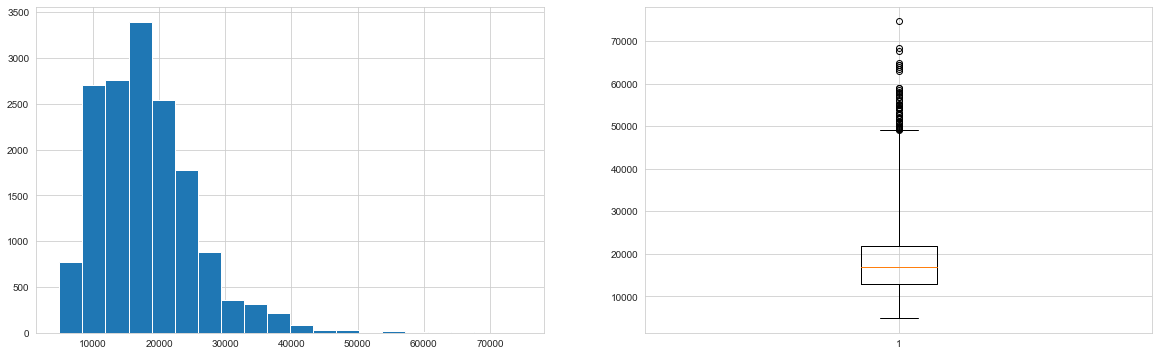

In [89]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

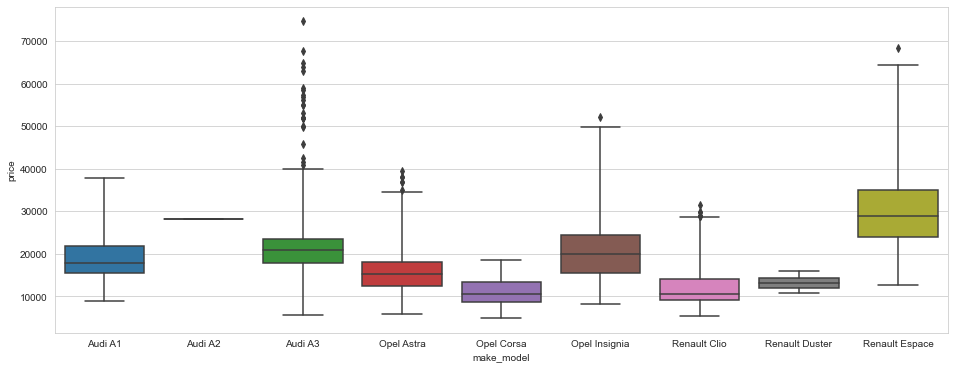

In [90]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## make_model

In [91]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [92]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Warranty,Cylinders,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Upholstery_color,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,NaN,NaN,Diesel,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Hands-free equipme...",['Alloy wheels'],"['ABS', 'Adaptive Cruise Control', 'Central do...",6.000,1.000,1.000,85.000,NaN,Metallic,Cloth,Black,Manual,1598.000,1135.000,front,4.900,5.600,4.500,117.000,Euro 6


The **``Audi A2``** (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi **from November 1999 (for the 2000 model year) to August 2005** [Source](https://en.wikipedia.org/wiki/Audi_A2). **So it is impossible to be a 1-year old Audi A2**.

In [93]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [94]:
df.drop(drop_index, axis=0, inplace=True)

In [95]:
df.shape

(15914, 30)

## Fuel

In [96]:
first_looking("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64


In [97]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,cons_comb,price
3356,Audi A3,Compact,107.000,6.000,150.000,NaN,24950
3612,Audi A3,Sedans,36.000,6.000,110.000,1.600,38450
3615,Audi A3,Sedans,36.000,6.000,110.000,1.600,35899
3617,Audi A3,Sedans,36.000,6.000,110.000,1.600,38000
13397,Renault Clio,Sedans,113.000,5.000,55.000,NaN,8490


In [98]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [99]:
df.drop(drop_index, axis=0, inplace=True)

In [100]:
df.reset_index(drop=True, inplace=True)

In [101]:
df.shape

(15909, 30)

## Final_Step

In [102]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Warranty,NaN,NaN,NaN
Cylinders,3.000,4.000,NaN
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"['Air conditioning', 'Armrest', 'Automatic cli...","['Air conditioning', 'Automatic climate contro...","['Air conditioning', 'Cruise control', 'Electr..."


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15849 non-null  object 
 2   price                15909 non-null  int64  
 3   vat                  11402 non-null  object 
 4   km                   15909 non-null  float64
 5   Type                 15907 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Cylinders            10231 non-null  float64
 8   Fuel                 15909 non-null  object 
 9   Comfort_Convenience  14989 non-null  object 
 10  Entertainment_Media  14535 non-null  object 
 11  Extras               12948 non-null  object 
 12  Safety_Security      14927 non-null  object 
 13  Gears                15876 non-null  float64
 14  age                  15909 non-null  float64
 15  Previous_Owners      9276 non-null  

In [104]:
df_num = df.select_dtypes("number")
df_num

,price,km,Warranty,Cylinders,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country,CO2_Emission
0,15770,56013.000,NaN,3.000,5.000,3.000,2.000,66.000,1422.000,1220.000,3.800,4.300,3.500,99.000
1,14500,80000.000,NaN,4.000,7.000,2.000,NaN,141.000,1798.000,1255.000,5.600,7.100,4.700,129.000
2,14640,83450.000,NaN,NaN,5.000,3.000,1.000,85.000,1598.000,1135.000,3.800,4.400,3.400,99.000
3,14500,73000.000,NaN,3.000,6.000,3.000,1.000,66.000,1422.000,1195.000,3.800,4.300,3.500,99.000
4,16790,16200.000,NaN,3.000,5.000,3.000,1.000,66.000,1422.000,1135.000,4.100,4.600,3.800,109.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.363,24.000,4.000,6.000,0.000,NaN,147.000,1997.000,1758.000,5.300,6.200,4.700,139.000
15905,39885,9900.000,NaN,4.000,7.000,0.000,1.000,165.000,1798.000,1708.000,7.400,9.200,6.300,168.000
15906,39875,15.000,NaN,4.000,6.000,0.000,1.000,146.000,1997.000,1734.000,5.300,6.200,4.700,139.000
15907,39700,10.000,NaN,4.000,6.000,0.000,NaN,147.000,1997.000,1758.000,5.300,6.200,4.700,139.000


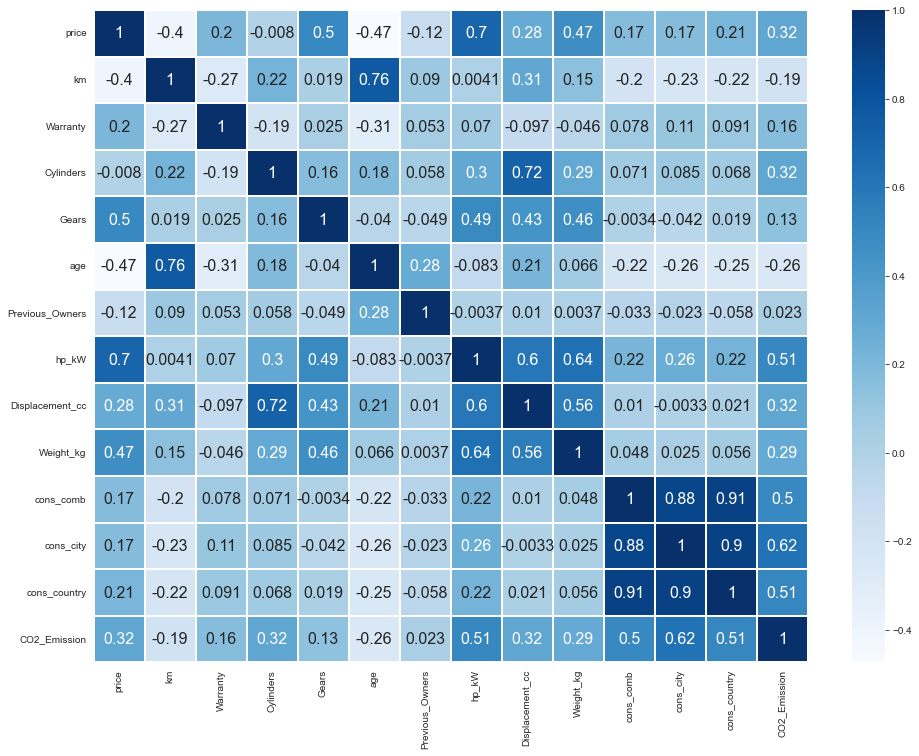

In [105]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [106]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,price,km,Warranty,Cylinders,Gears,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country,CO2_Emission
price,1.000000,-0.399443,0.203521,-0.008049,0.502975,-0.473689,-0.120834,0.696571,0.282421,0.466484,0.166834,0.166563,0.209342,0.317886
km,-0.399443,1.000000,-0.269704,0.223284,0.019310,0.758370,0.089826,0.004072,0.306581,0.147891,-0.198366,-0.234131,-0.221536,-0.186884
Warranty,0.203521,-0.269704,1.000000,-0.192534,0.024982,-0.311124,0.053015,0.069700,-0.096591,-0.045651,0.078276,0.107655,0.091114,0.160021
Cylinders,-0.008049,0.223284,-0.192534,1.000000,0.163789,0.184248,0.057520,0.303070,0.715693,0.292884,0.071090,0.084882,0.067566,0.318992
Gears,0.502975,0.019310,0.024982,0.163789,1.000000,-0.039943,-0.048699,0.493234,0.432559,0.463564,-0.003363,-0.041964,0.019108,0.132397
age,-0.473689,0.758370,-0.311124,0.184248,-0.039943,1.000000,0.283346,-0.083448,0.214944,0.066224,-0.219357,-0.258106,-0.252558,-0.260008
Previous_Owners,-0.120834,0.089826,0.053015,0.057520,-0.048699,0.283346,1.000000,-0.003693,0.010041,0.003652,-0.033203,-0.023162,-0.057833,0.023165
hp_kW,0.696571,0.004072,0.069700,0.303070,0.493234,-0.083448,-0.003693,1.000000,0.597793,0.637100,0.216645,0.263404,0.224889,0.509719
Displacement_cc,0.282421,0.306581,-0.096591,0.715693,0.432559,0.214944,0.010041,0.597793,1.000000,0.563419,0.010467,-0.003250,0.020719,0.317517
Weight_kg,0.466484,0.147891,-0.045651,0.292884,0.463564,0.066224,0.003652,0.637100,0.563419,1.000000,0.048263,0.024691,0.056341,0.291232


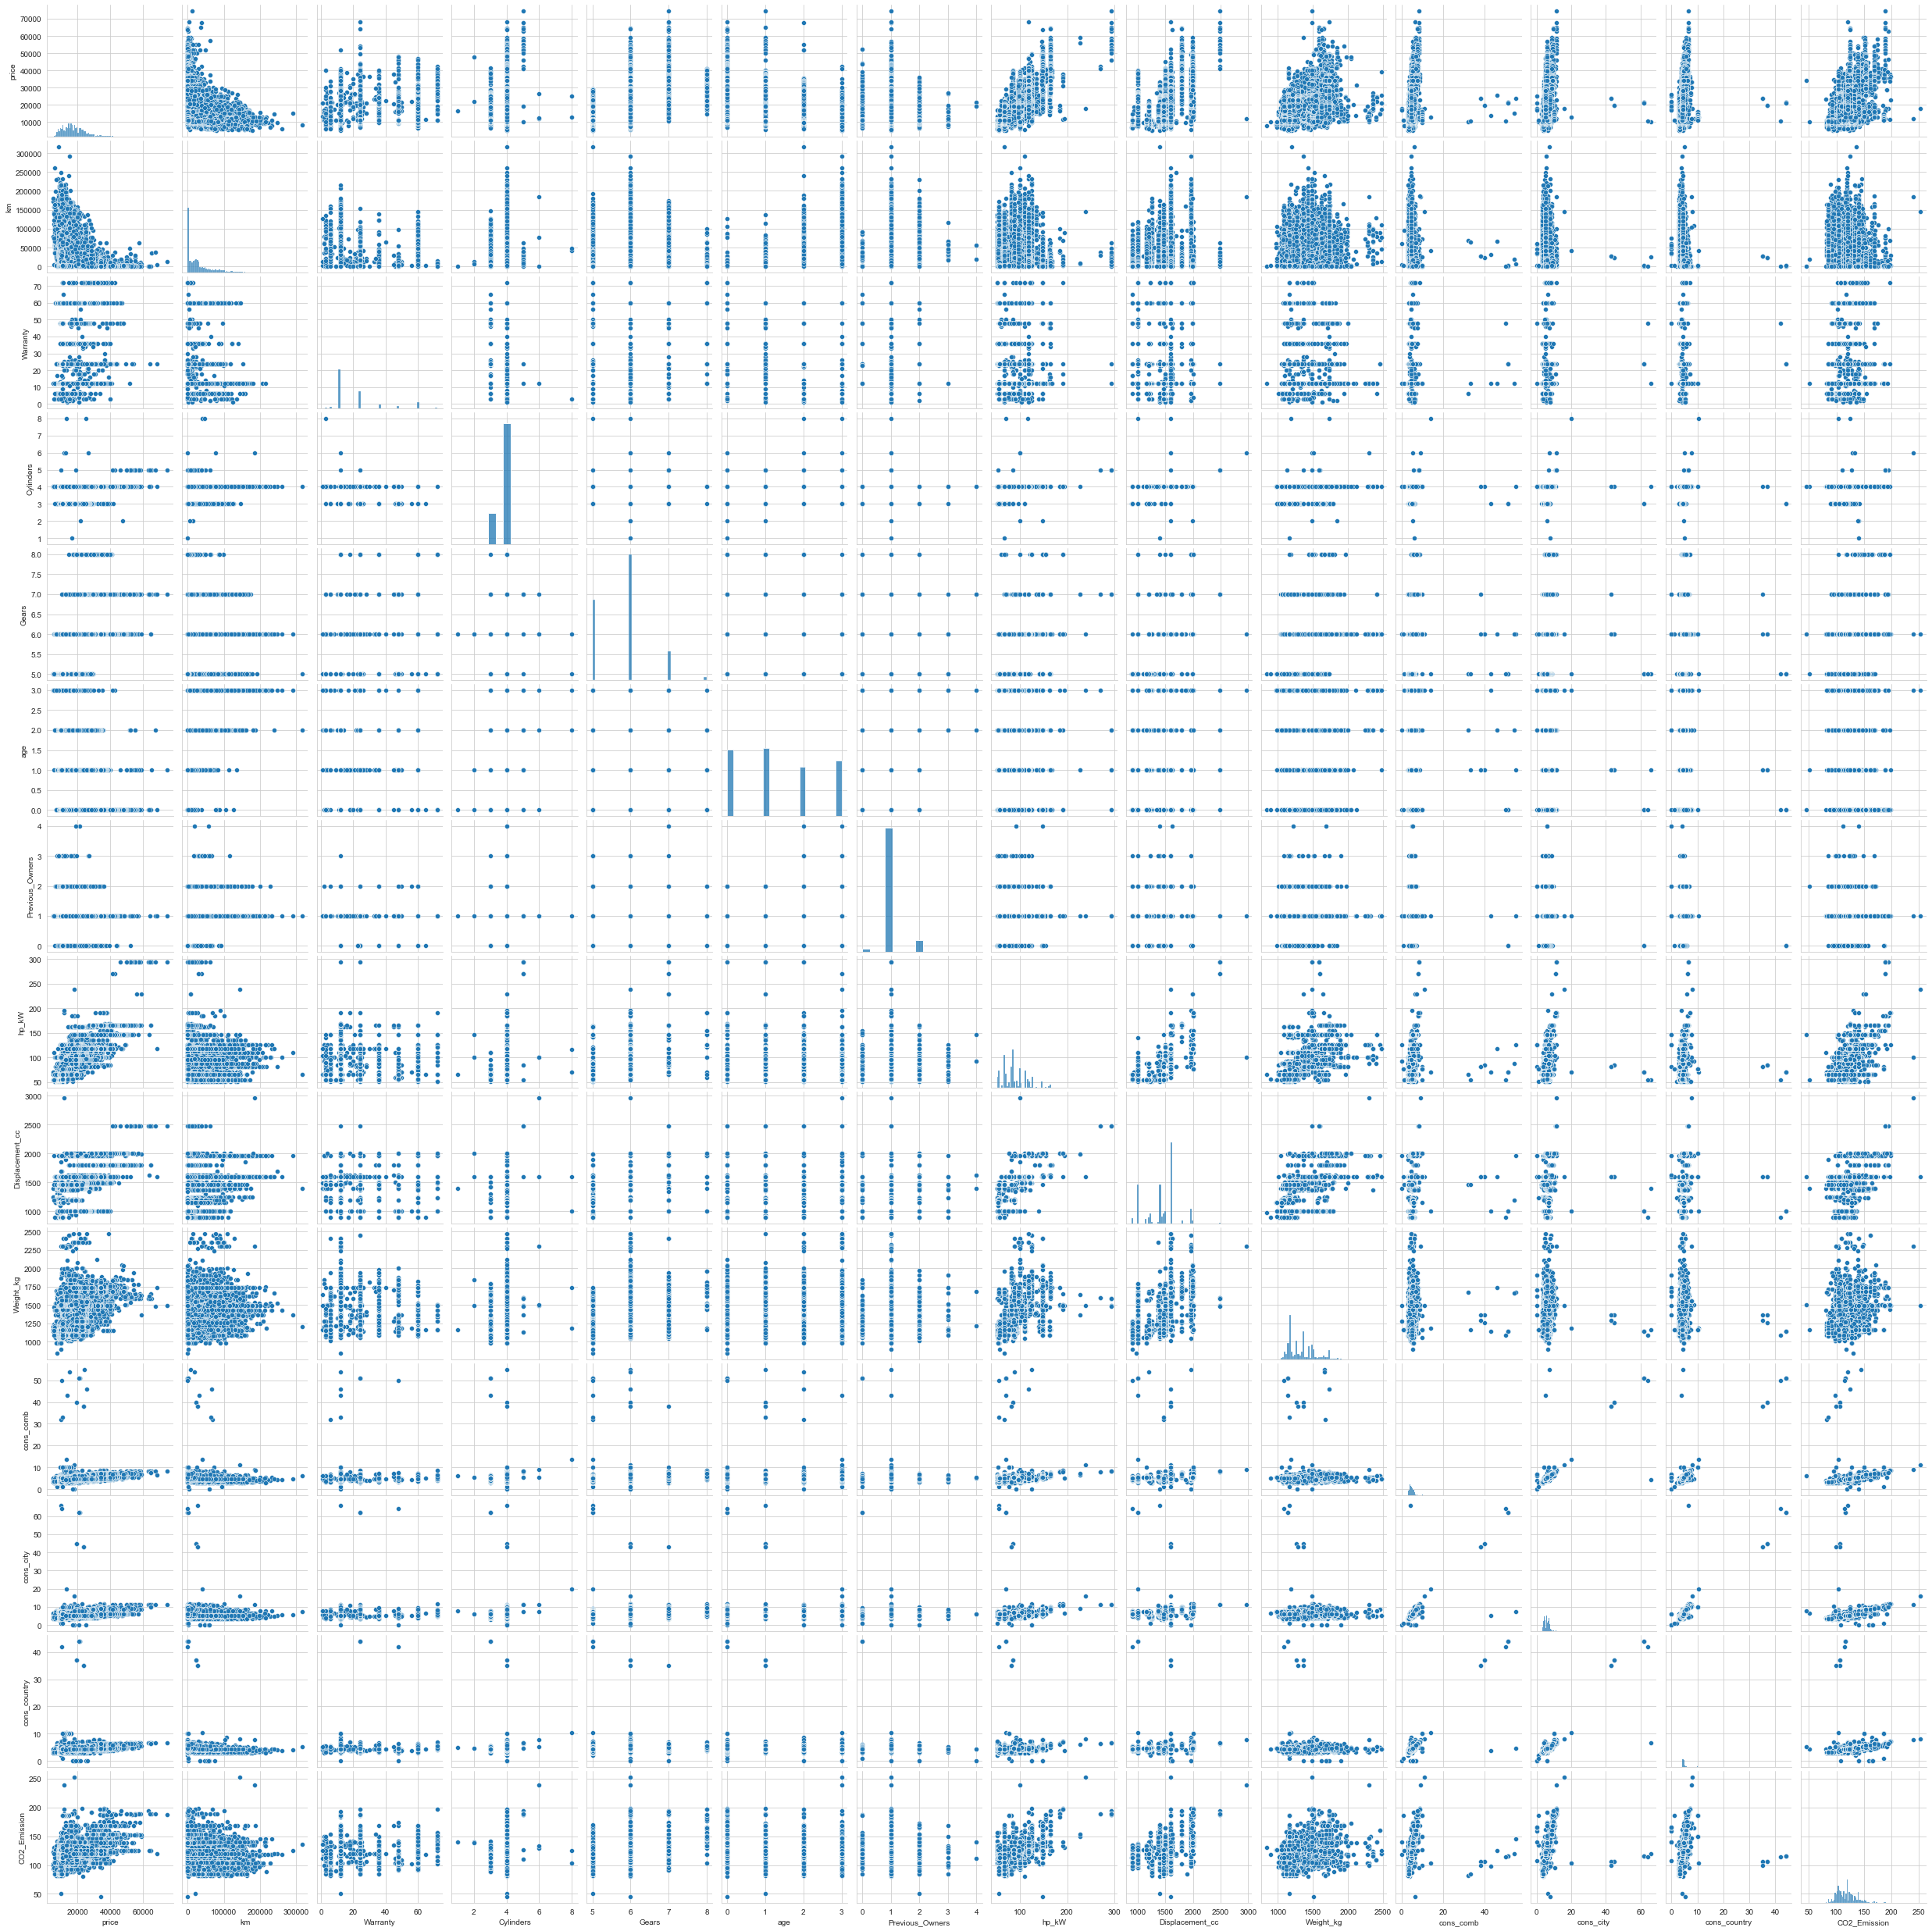

In [107]:
sns.pairplot(df_num, size=2.5);

**Because of the multicollinearity between "CO2_Emission and cons_comb", I have decided to drop cons_comb column.** 

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [108]:
df.drop("cons_comb", axis=1, inplace = True)

In [109]:
df.shape

(15909, 29)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dummy Operation</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15849 non-null  object 
 2   price                15909 non-null  int64  
 3   vat                  11402 non-null  object 
 4   km                   15909 non-null  float64
 5   Type                 15907 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Cylinders            10231 non-null  float64
 8   Fuel                 15909 non-null  object 
 9   Comfort_Convenience  14989 non-null  object 
 10  Entertainment_Media  14535 non-null  object 
 11  Extras               12948 non-null  object 
 12  Safety_Security      14927 non-null  object 
 13  Gears                15876 non-null  float64
 14  age                  15909 non-null  float64
 15  Previous_Owners      9276 non-null  

In [111]:
df.shape

(15909, 29)

In [112]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [113]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [114]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], axis=1, inplace=True)

In [115]:
df.shape

(15909, 280)

In [116]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Warranty,NaN,NaN,NaN,NaN,NaN
Cylinders,3.000,4.000,NaN,3.000,3.000
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,5.000,7.000,5.000,6.000,5.000


In [117]:
df_final = pd.get_dummies(df, drop_first=True)

In [118]:
df_final.shape

(15909, 311)

In [119]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
Warranty,NaN,NaN,NaN,NaN,NaN
Cylinders,3.000,4.000,NaN,3.000,3.000
Gears,5.000,7.000,5.000,6.000,5.000
age,3.000,2.000,3.000,3.000,3.000
Previous_Owners,2.000,NaN,1.000,1.000,1.000
hp_kW,66.000,141.000,85.000,66.000,66.000
Displacement_cc,1422.000,1798.000,1598.000,1422.000,1422.000
Weight_kg,1220.000,1255.000,1135.000,1195.000,1135.000


In [120]:
df_final.to_csv("final_scout_dummy.csv", index=False)